# Codigo para visualizar el artico

In [3]:
import plotly.express as px
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np 
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

In [4]:
# Leer el archivo CSV
file_path1 = 'C:/Users/VICTUS/OneDrive/LinkedIn/30DayChallenge - copia/Day11/Data1.csv'  # Cambia esto por la ruta de tu archivo CSV
data1 = pd.read_csv(file_path1, encoding='latin1', sep=';')
print(data1.head())

                          Scientific name Country or area   Lat   Long  \
0  Canis lupus subsp. arctos Pocock, 1935          Canada  81.3   75.8   
1  Canis lupus subsp. arctos Pocock, 1935          Canada  81.4   76.4   
2  Canis lupus subsp. arctos Pocock, 1935       Greenland  71.1   22.1   
3  Canis lupus subsp. arctos Pocock, 1935          Canada  64.7  110.8   
4  Canis lupus subsp. arctos Pocock, 1935          Canada  71.2   78.8   

  Occurrence status     Class      Order   Family  Genus      Species  
0           Present  Mammalia  Carnivora  Canidae  Canis  Canis lupus  
1           Present  Mammalia  Carnivora  Canidae  Canis  Canis lupus  
2           Present  Mammalia  Carnivora  Canidae  Canis  Canis lupus  
3           Present  Mammalia  Carnivora  Canidae  Canis  Canis lupus  
4           Present  Mammalia  Carnivora  Canidae  Canis  Canis lupus  


c:\Users\VICTUS\miniconda3\envs\gee\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


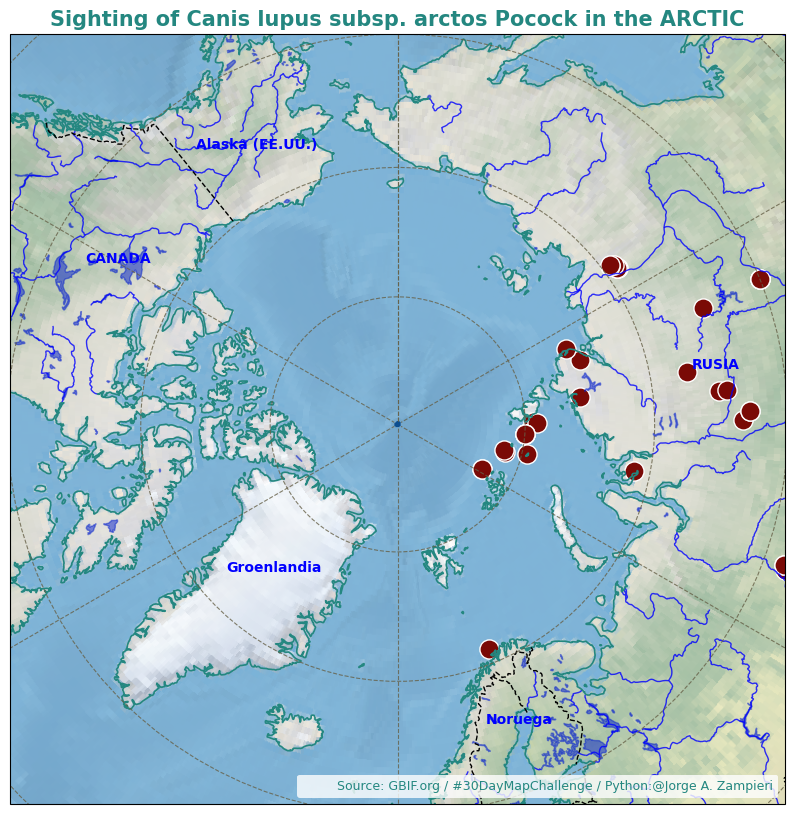

In [5]:
# Crear la figura y establecer la proyección
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())  # Extensión para mostrar el Ártico

# Título del mapa
plt.title("Sighting of Canis lupus subsp. arctos Pocock in the ARCTIC", fontsize=15, fontweight='bold', color='#248780', bbox={'facecolor': 'none', 'pad': 5,'edgecolor': 'none'})

#ax.add_image(map_tiles_image, zoom_level)
# Añadir características de tierra y agua de "Natural Earth"
ax.stock_img()  # Añade una imagen de fondo de baja resolución
ax.add_feature(cfeature.OCEAN, color='#0d4e8f')
ax.add_feature(cfeature.LAKES, color='#0621cd', alpha=0.5)
ax.add_feature(cfeature.RIVERS, color='blue', alpha=0.8)
ax.add_feature(cfeature.LAND, color='#6f663e', alpha=0.8)

# Añadir líneas de costa y fronteras
ax.coastlines(color="#248780", linewidth=1.2)
ax.add_feature(cfeature.BORDERS, linestyle='--', edgecolor='black')

# Dibujar el Círculo Polar Ártico (~66.5°N)
theta = np.linspace(0, 2 * np.pi, 100)
lat_circle = 66.5
r = 90 - lat_circle  # Distancia desde el Polo Norte en grados
ax.plot(r * np.cos(theta), r * np.sin(theta), transform=ccrs.AzimuthalEquidistant(central_latitude=90),
        color='#7a0a06', linestyle='none', linewidth='1', label="Source: GBIF.org / #30DayMapChallenge / Python:@Jorge A. Zampieri")


# Añadiendo líneas de latitud y longitud en grados
gl = ax.gridlines(draw_labels=False, linestyle="--", color="#666047", alpha=0.8)
gl.xlabels_top = False  # Ocultar etiquetas superiores
gl.ylabels_right = False  # Ocultar etiquetas laterales derechas

# Etiquetas para algunos países y áreas importantes en el Ártico
country_labels = {
    "CANADÁ": (-120, 65),
    "Groenlandia": (-40, 75),
    "RUSIA": (100, 65),
    "Noruega": (22, 65),
    "Alaska (EE.UU.)": (-153, 66),
}

# Añadir etiquetas de países en el mapa
for country, (lon, lat) in country_labels.items():
    ax.text(lon, lat, country, transform=ccrs.PlateCarree(),
            fontsize=10, fontweight='bold', color='blue', ha='center')

# Añadir leyenda 'top', 'bottom', 'center', 'baseline', 'center_baseline'
legend=plt.legend(loc='lower right', fontsize=9, edgecolor='none')

# Cambiar el color del texto en la leyenda 
for text in legend.get_texts(): 
        text.set_color('#248780')
        
ax.scatter(data1['Long'], data1['Lat'], facecolor='#7a0a06', edgecolor='white', s=190, transform=ccrs.PlateCarree())
# Mostrar el mapa 
plt.show()
